## Analyses of Pure- after Complex-tone trials

In [1]:
from paper_utils import *
%matplotlib inline
from matplotlib.pyplot import * 

c:\Users\user\miniconda3\envs\py39\lib\site-packages\rpy2\robjects\pandas2ri.py:17: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex


In [2]:
dfs, datas, columns = load_data()
dfs, columns = organize_data(dfs, columns)
df_comb, df1, df2, df3 = combine_data(dfs)

complex_pure_mixed_no_missing
in log e
(1, 310)
(1, 310)
(1, 310)
before filtering:  310
After acc filtering:  239
After consistency filtering:  230
(1, 230)
(1, 230)
(1, 230)
total left:  230/310
total excluded:  80/310
included: 74.1 % ; excluded: 25.8 %
complex_pure_mixed_missing_f
in log e
(1, 400)
(1, 400)
(1, 400)
before filtering:  400
After acc filtering:  332
After consistency filtering:  316
(1, 316)
(1, 316)
(1, 316)
total left:  316/400
total excluded:  84/400
included: 79.0 % ; excluded: 21.0 %
complex_pure_mixed_missing_f1
in log e
(1, 338)
(1, 338)
(1, 338)
before filtering:  338
After acc filtering:  272
After consistency filtering:  253
(1, 253)
(1, 253)
(1, 253)
total left:  253/338
total excluded:  85/338
included: 74.8 % ; excluded: 25.1 %
67850
93220
74635


In [ ]:
'''
R model:
model = y~ s(acc,by=df,k=5) + d1_r + d1x2_r + s(dinf,k=7) + 
s(subject,bs="re") + s(d1_r,subject,bs="re")+ s(d1x2_r,subject,bs="re")

'''

In [3]:
'''
Export results from R
'''

A_comp_pure2 = []
E_comp_pure2 = []
readRDS = robjects.r['readRDS']
df_tmp = readRDS('C:/Users/user/Aviel/Bias Project/project/Data/rds_files/my_data_0.rds')
df_tmp = pandas2ri.ri2py(df_tmp)

fs = np.array(df_tmp[0])
es = np.array(df_tmp[1])
A_comp_pure2.append(fs)
E_comp_pure2.append(es)

df_tmp = readRDS('C:/Users/user/Aviel/Bias Project/project/Data/rds_files/my_data_1.rds')
df_tmp = pandas2ri.ri2py(df_tmp)

fs = np.array(df_tmp[0])
es = np.array(df_tmp[1])
A_comp_pure2.append(fs)
E_comp_pure2.append(es)

df_tmp = readRDS('C:/Users/user/Aviel/Bias Project/project/Data/rds_files/my_data_2.rds')
df_tmp = pandas2ri.ri2py(df_tmp)

fs = np.array(df_tmp[0])
es = np.array(df_tmp[1])
A_comp_pure2.append(fs)
E_comp_pure2.append(es)

### Contraction of pure tones (500-1000Hz) towards the fundamental of complex tones

In [5]:
inter = []
d1_var = []
d1x2_var = []

d1_area = []
d1x2_area = []

d1_slope = []
d1x2_slope = []
# dinf_var = []
# dinf_difference_var = []


for i in range(3):
    d1_var.append([])
    d1x2_var.append([])

    d1_area.append([])
    d1x2_area.append([])
    
    d1_slope.append([])
    d1x2_slope.append([])
    
    inter.append([])
    
    fs = -A_comp_pure2[i]
    df = dfs[i]
    df_1 = df[(df['flags_d1'].values==2) | (df['flags_d1'].values==3)].copy()
    df_1 = df_1.set_index(np.arange(len(df_1)))


    df_1['d1_r'] = df_1['d1']
    df_1['d1_r'][df_1['dinf']>0] = 0
    for p in range(int(df_1['subject'].max()+1)):
        o = df_1['subject'].values==p
        I = fs[o,0]!=0
        vals = fs[o,0][I]+fs[o,5][I]
        d1_var[-1].append(vals.var())
        d1_area[-1].append(np.abs(vals).mean())
        d1_slope[-1].append((vals/(df_1['d1'].values[o][I]))[0])

        vals = fs[o,1][~I]+fs[o,6][~I]
        d1x2_var[-1].append(vals.var())
        d1x2_area[-1].append(np.abs(vals).mean())
        d1x2_slope[-1].append((vals/(df_1['d1x2'].values[o][~I]))[0])


# Contraction of pure tones towards the fundamental of complex tones
        inter[-1].append(fs[o,4][0])

c:\Users\user\miniconda3\envs\py39\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\Users\user\miniconda3\envs\py39\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide


c:\Users\user\miniconda3\envs\py39\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\Users\user\miniconda3\envs\py39\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\Users\user\miniconda3\envs\py39\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


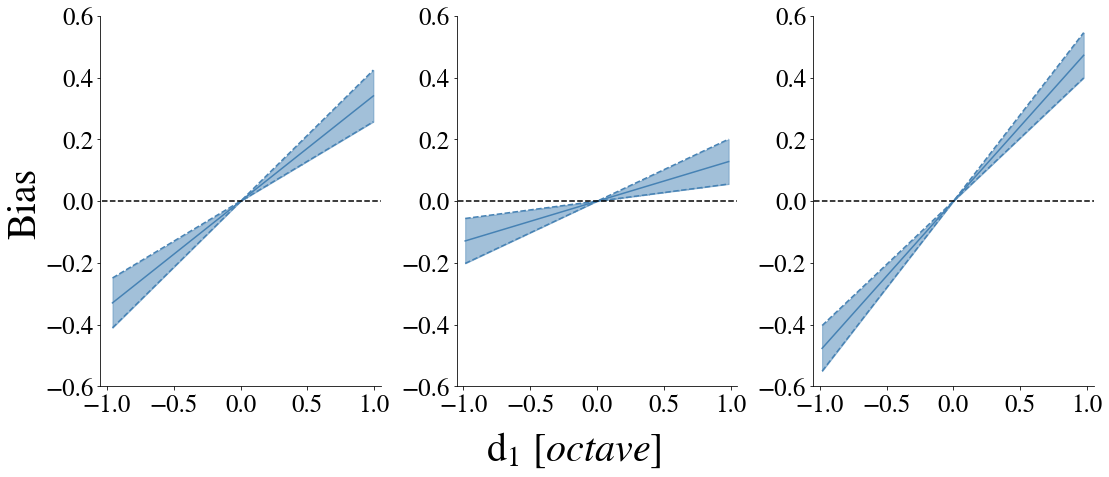

In [6]:
f ,axarr = plt.subplots(1,3,figsize=(15,6), sharex=True)
alpha=.5
colors1 = ['steelblue', 'steelblue', 'steelblue']

# Chaning font to stix
rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

for n,i in enumerate(range(3)):
    df = dfs[i]
    ax = axarr[i]

    df_1 = df[(df['flags_d1'].values==2) | (df['flags_d1'].values==3)].copy()
    df_1 = df_1.set_index(np.arange(len(df_1)))

    df_1['d1_r'] = df_1['d1']
    df_1['d1_r'][df_1['dinf']>0] = 0

    fs,es = -A_comp_pure2[n], -E_comp_pure2[n]
    
    o = np.argsort(df_1['d1_r'].values)
    
    plot_with_errors(ax,df_1['d1_r'].values[o],fs[o,0],es[o,0],colors1[n],alpha=.5)
    
    simpleaxis(ax, 25)
    draw_horizonal(ax,-1.1,1.1,0)  

for ax in axarr.flatten():
    ax.set_xlim([-1.05,1.05])
    plt.xticks(np.arange(-1,1.1,0.5))
    ax.set_ylim([-.6, .6])

f.text(0.5, -0.075, '$\mathrm{d_{1}} \\ [octave]}$', fontsize=40, ha='center')
f.text(-0.025, 0.52, 'Bias', fontsize=40, va='center', rotation='vertical')

plt.tight_layout()
# saveas = 'images/figure3_'+'half_2'+'.png'
# plt.savefig(saveas, format='png', dpi=800,bbox_inches='tight')
plt.show()

c:\Users\user\miniconda3\envs\py39\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


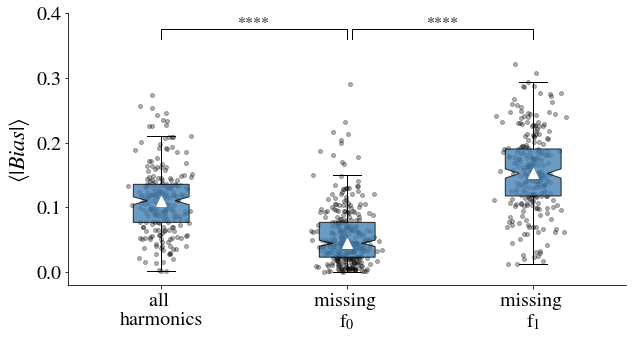

In [7]:
# Contraction of pure tones towards the fundamental of complex tones

def box_plot(ax, data, xlabel = [], ylabel = [], title = '', alpha_face = 1, show_ind_dots = True, colors = []):
    
    l = len(data)
    y = np.arange(l)
    
    noise = []
    ys = []
    for i in range(l):
        ys.append(np.ones_like(data[i])*y[i])
        noise.append(np.random.randn(len(ys[i]))*.07)
    if show_ind_dots:
        for i in range(l):
            ax.plot(ys[i]+noise[i],data[i],'o',ms=4,color='k',alpha=.3)
        try:
            ax.plot(ys, data,  '-', color = 'k',alpha=.05)
            ax.plot(ys, np.mean(data,1), '-k',lw=2)
        except:
            pass
    
    bplot1 = ax.boxplot(data , notch = 'True', positions=y, vert=1, patch_artist=True, showmeans=False,\
                        meanprops={"markerfacecolor":"w", "markeredgecolor":"w"},\
                        showfliers = False, widths = 0.3, boxprops=dict(alpha=alpha_face))
    
    for patch,c in zip(bplot1['boxes'],colors):
        patch.set_facecolor(c)
        patch.set_alpha(alpha_face)
        
    for median in bplot1['medians']:
        median.set_color('firebrick')
        median.set(linewidth=0)


# mpl.rcParams['mathtext.fontset'] = 'stix'
# mpl.rcParams['font.family'] = 'STIXGeneral'

colors = ['steelblue','steelblue','steelblue']

data = d1_area

# exp_titles = ['all \nharmonics','missing \nF0','missing \nF1']
labels = r'$\langle|Bias|\rangle$' 

f, axarr = plt.subplots(figsize = (10,5))
ax = axarr

box_plot(ax, data, 
        xlabel = ['all \nharmonics','missing \n$\mathrm{f_0}$','missing \n$\mathrm{f_1}$'],
        ylabel = labels, 
        colors = colors, 
        alpha_face = 0.8)

ax.set_xticklabels(['all \nharmonics','missing \n$\mathrm{f_0}$','missing \n$\mathrm{f_1}$'], fontsize=22)
ax.set_ylabel(labels, fontsize = 22)

simpleaxis(ax,20)

# plot the medians with triangle markers inside the boxplot
y_median = []
x_median = [0, 1, 2]
for x in x_median:
    y_median.append(np.median(d1_area[x]))

plot(x_median, y_median, marker = '^', markerfacecolor='white', markersize = 10, 
    markeredgecolor = 'white', color='white', linestyle='')


# statistical annotation
x1, x2, x3 = 0, 1, 2 # columns 'all harmonics', 'missing f0', 'missing f1' 
y, h, col = 0.36, 0.015, 'k'
delta = 0.025

plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c=col)
plt.text((x1+x2)*.5, y+h, "****", ha='center', va='bottom', color=col, fontsize=16)

x2 = x2+delta
plt.plot([x2, x2, x3, x3], [y, y+h, y+h, y], lw=1, c=col)
plt.text((x2+x3)*.5, y+h, "****", ha='center', va='bottom', color=col, fontsize=16)

# y = y+delta*1.5
# plt.plot([x1, x1, x3, x3], [y, y+h, y+h, y], lw=1, c=col)
# plt.text((x1+x3)*.5, y+h, "****", ha='center', va='bottom', color=col, fontsize=16)


plt.ylim(-0.02, 0.4)

# plt.tight_layout(h_pad=4)
#saveas = '../images/figure4/figure4_'+str(5)+'.png'
#plt.savefig(saveas, format='png', dpi=800,bbox_inches='tight')

plt.show()

### Contraction of pure tones (1000-2000Hz) towards the second harmonic of complex tones

c:\Users\user\miniconda3\envs\py39\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\Users\user\miniconda3\envs\py39\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\Users\user\miniconda3\envs\py39\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\Users\user\miniconda3\envs\py39\lib\site-packages\ipykernel_launche

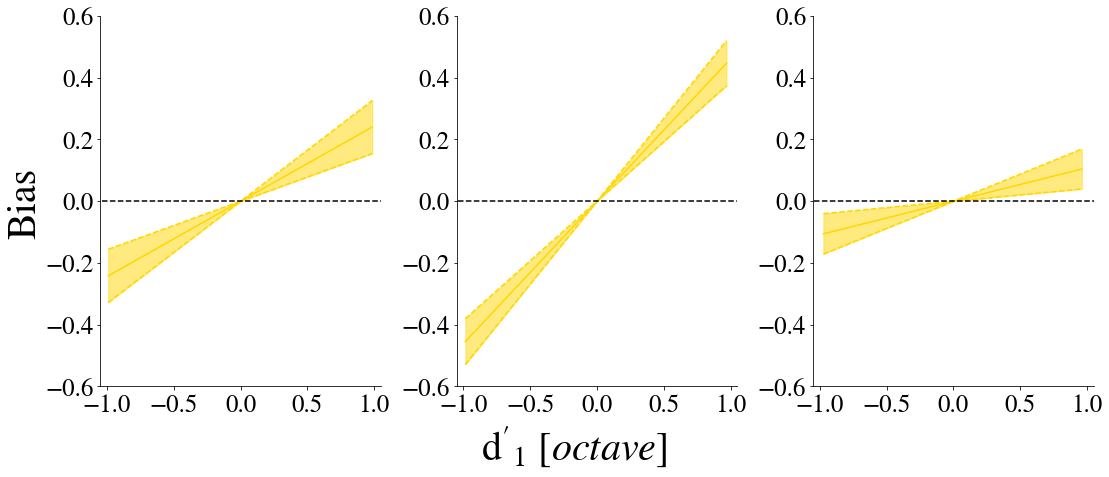

In [8]:
f ,axarr = plt.subplots(1,3,figsize=(15,6),sharex=True)
alpha=.5
colors2 = ['gold','gold','gold']

# Chaning font to stix
rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'


for n,i in enumerate(range(3)):
    df = dfs[i]
    ax = axarr[i]

    df_1 = df[(df['flags_d1'].values==2) | (df['flags_d1'].values==3)].copy()
    df_1 = df_1.set_index(np.arange(len(df_1)))

    df_1['d1_r'] = df_1['d1']
    df_1['d1_r'][df_1['dinf']>0] = 0

    fs,es = -A_comp_pure2[n], -E_comp_pure2[n]

    df_1['d1x2_r'] = df_1['d1x2']
    df_1['d1x2_r'][df_1['dinf']<0] = 0
    
    o = np.argsort(df_1['d1x2_r'].values)
    '''
    right side
    '''
    plot_with_errors(ax,df_1['d1x2_r'].values[o],fs[o,1],es[o,1],colors2[n],alpha=.5)
    
    simpleaxis(ax, 25)
    draw_horizonal(ax,-1.1,1.1,0)

for ax in axarr.flatten():
    ax.set_xlim([-1.05,1.05])
    plt.xticks(np.arange(-1,1.1,0.5))
    ax.set_ylim([-.6, .6])

f.text(0.5, -0.075, "$\mathrm{d'_{1}} \\ [octave]}$", fontsize=40, ha='center')
f.text(-0.025, 0.52, 'Bias', fontsize=40, va='center', rotation='vertical')

plt.tight_layout()

# saveas = 'images/figure3_'+'half_1'+'.png'
# plt.savefig(saveas, format='png', dpi=800,bbox_inches='tight')

plt.show()

c:\Users\user\miniconda3\envs\py39\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


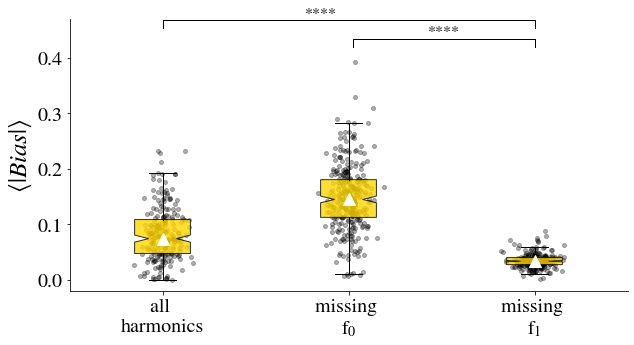

In [9]:
def box_plot(ax, data, xlabel = [], ylabel = [], title = '', alpha_face = 1, show_ind_dots = True, colors = []):
    
    l = len(data)
    y = np.arange(l)
    
    noise = []
    ys = []
    for i in range(l):
        ys.append(np.ones_like(data[i])*y[i])
        noise.append(np.random.randn(len(ys[i]))*.06)
    if show_ind_dots:
        for i in range(l):
            ax.plot(ys[i]+noise[i],data[i],'o',ms=4,color='k',alpha=.3)
        try:
            ax.plot(ys, data,  '-', color = 'k',alpha=.05)
            ax.plot(ys, np.mean(data,1), '-k',lw=2)
        except:
            pass
    
    bplot1 = ax.boxplot(data , notch = 'True', positions=y, vert=1, patch_artist=True, showmeans=False,\
                        meanprops={"markerfacecolor":"w", "markeredgecolor":"w"},\
                        showfliers = False, widths = 0.3, boxprops=dict(alpha=alpha_face))
    
    for patch,c in zip(bplot1['boxes'],colors):
        patch.set_facecolor(c)
        patch.set_alpha(alpha_face)
        
    for median in bplot1['medians']:
        median.set_color('firebrick')
        median.set(linewidth=0)


colors = ['gold', 'gold', 'gold']

data = d1x2_area

labels = r'$\langle|Bias|\rangle$'    

f, axarr = plt.subplots(figsize = (10,5))
ax = axarr

box_plot(ax, data, 
         xlabel = ['all \nharmonics','missing \n$\mathrm{f_0}$','missing \n$\mathrm{f_1}$'],
         ylabel = labels, 
         colors = colors, 
         alpha_face = 0.8)

ax.set_xticklabels(['all \nharmonics','missing \n$\mathrm{f_0}$','missing \n$\mathrm{f_1}$'], fontsize=22)
ax.set_ylabel(labels, fontsize = 25)

simpleaxis(ax,20)

# plot the medians with triangle markers inside the boxplot
y_median = []
x_median = [0, 1, 2]
for x in x_median:
    y_median.append(np.median(d1x2_area[x]))

plot(x_median, y_median, marker = '^', markerfacecolor='white', markersize = 12, 
    markeredgecolor = 'white', color='white', linestyle='')


# statistical annotation
x1, x2, x3 = 0, 1, 2 # columns 'all harmonics', 'missing f0', 'missing f1' 
y, h, col = 0.42, 0.015, 'k'
delta = 0.025

# plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c=col)
# plt.text((x1+x2)*.5, y+h, "****", ha='center', va='bottom', color=col, fontsize=16)

x2 = x2+delta
plt.plot([x2, x2, x3, x3], [y, y+h, y+h, y], lw=1, c=col)
plt.text((x2+x3)*.5, y+h, "****", ha='center', va='bottom', color=col, fontsize=16)

y = y+delta*1.35
plt.plot([x1, x1, x3, x3], [y, y+h, y+h, y], lw=1, c=col)
plt.text((x1+x3-12*delta)*.5, y+h, "****", ha='center', va='bottom', color=col, fontsize=16)

plt.ylim(-0.02, 0.47)

plt.show()

## Statistics

In [ ]:
models =  ['y~ s(alphas,by=df,k=5) + d1_r + d1x2_r  + s(dinf,k=7) + \
                s(subject,bs="re") + s(d1_r,subject,bs="re")+ s(d1x2_r,subject,bs="re")',

            'y~ s(alphas,by=df,k=5) + d1_r + s(dinf,k=7) + \
                s(subject,bs="re") + s(d1_r,subject,bs="re")',

            'y~ s(alphas, by=df,k=5) + d1x2_r + s(dinf,k=7) + \
                s(subject,bs="re") + s(d1x2_r,subject,bs="re")']

j=0 # select experiment 0,1,2 for all harmonics, missing f0, missing f1, respectively.

print(j)
df = dfs[j]

df_1 = df[(df['flags_d1'].values==2) | (df['flags_d1'].values==3)].copy()
df_1 = df_1.set_index(np.arange(len(df_1)))

df_1['d1_r'] = df_1['d1']
df_1['d1_r'][df_1['dinf']>0] = 0

df_1['d1x2_r'] = df_1['d1x2']
df_1['d1x2_r'][df_1['dinf']<0] = 0

print(len(df_1))

datar = base.data_frame(df_1)
datar[columns.index('subject')] = base.as_factor(datar[columns.index('subject')]) # declaring y1 into a factor

print('=================  exp {} ============================'.format(str(j)))
print( '-------------- addition of d1 --------------------')

b = mgcv.gam(ro.r(models[0]),\
        data=datar,\
        family=fam,\
        optimizer='perf')

b2 = mgcv.gam(ro.r(models[2]),\
            data=datar,\
            family=fam,\
            optimizer='perf')

print(mgcv.anova_gam(b,b2,test='Chisq'))
# print(mgcv.summary_gam(b))
# print(mgcv.summary_gam(b2)) 


print( '-------------- addition of d1x2 --------------------')
b = mgcv.gam(ro.r(models[0]),\
        data=datar,\
        family=fam,\
        optimizer='perf')

b2 = mgcv.gam(ro.r(models[1]),\
            data=datar,\
            family=fam,\
            optimizer='perf')

print(mgcv.anova_gam(b,b2,test='Chisq'))P
print(mgcv.summary_gam(b))
# print(mgcv.summary_gam(b2))

In [ ]:
dunn = importr('dunn.test')

for param, param_name in zip([d1_slope], ['$\mathrm{<|Bias|>}$' ]):
    print('=========================================')
    print(param_name)
    print('============KRUSKAL===============')
    print(kruskal(*param))
    k = dunn.dunn_test(param, method="bonferroni")
    print('============DUNN===============')
    print(k)

In [ ]:
dunn = importr('dunn.test')

for param, param_name in zip([d1x2_slope], ['$\mathrm{<|Bias|>}$' ]):
    print('=========================================')
    print(param_name)
    print('============KRUSKAL===============')
    print(kruskal(*param))
    k = dunn.dunn_test(param, method="bonferroni")
    print('============DUNN===============')
    print(k)

In [ ]:
methods = ['variance','area','slope']
for i in range(3):
    print('==============================')
    print('Exp:{}'.format(i))
    for m,data in enumerate([[d1_var , d1x2_var], [d1_area, d1x2_area], [d1_slope, d1x2_slope]]):
        print('method: {}'.format(methods[m]))
        print('{}/{}'.format((np.array(data[0][i])>0).sum(), len(data[0][i])))
        print('{}/{}'.format((np.array(data[1][i])>0).sum(), len(data[1][i])))

In [ ]:
# testing the significant of slopes (larger than 0)
for i in range(3):
    print('==============================')
    for data in [[d1_slope, d1x2_slope]]:
        print(wilcoxon(data[0][i]))
        print(wilcoxon(data[1][i]))

## Analyses of Complex- after Pure-tone trials
### Contraction of the fundamental of the complex tones towards the pure tones (500-100Hz)

In [ ]:
mgcv = importr('mgcv')
base = importr('base')
psyphy= importr('psyphy')
stats = importr('stats')
link = psyphy.probit_2asym(.05,.05)
fam = stats.binomial(link)

In [ ]:
fss = []
fes = []

model = 'y ~ s(alphas,by=df,k=5) + d1_r + s(dinf,k=7) \
            + s(subject,bs="re") + s(d1_r,subject,bs="re")'

for j in range(3):
        print(j)
        df = dfs[j]
        
        # df_1 = df[(df['flags_d1'].values==4) | (df['flags_d1'].values==5)].copy()
        df_1 = df[(df['flags_d1'].values==4)].copy()
        df_1 = df_1.set_index(np.arange(len(df_1)))
        
        df_1['d1_r'] = df_1['d1']
        print(len(df_1))

        try:
                fs,es = mgcv_fit_bam(df_1,model,factors=['flags_d1','flag','subject'])
        except:
                fs,es = mgcv_fit(df_1,model,factors=['flags_d1','flag','subject'])
        
        fss.append(fs)
        fes.append(es)

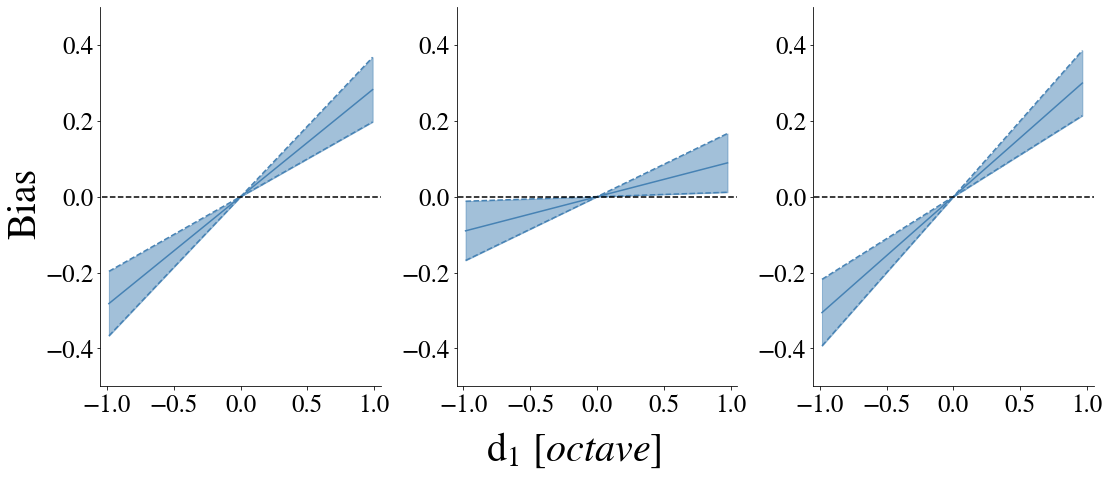

In [10]:
import pickle
df_1,fss,fes = pickle.load(open("gam_Pure_Complex.p", "rb"))

f ,axarr = plt.subplots(1,3,figsize=(15,6),sharex=True)
# colors = ['blue','green','cornflowerblue','lightgreen','red','m']
alpha=.5
# colors = ['b' ,'g', 'r', 'y']
# colors = ['dodgerblue', 'dodgerblue', 'dodgerblue']
colors = ['steelblue', 'steelblue', 'steelblue']
# colors = ['gold', 'gold', 'gold']


# Chaning font to stix
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from cycler import cycler
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'


for i,df in enumerate([df1,df2,df3]):
    ax = axarr[i]

    df_1 = df[(df['flags_d1'].values==4)].copy()
    df_1 = df_1.set_index(np.arange(len(df_1)))
    
    df_1['d1_r'] = df_1['d1']
    
    fs,es = fss[i],fes[i]

    o = np.argsort(df_1['d1_r'].values)
    plot_with_errors(ax,df_1['d1_r'].values[o],fs[o,0],es[o,0],colors[i],alpha=.5)

    simpleaxis(ax, 25)
    draw_horizonal(ax,-1.1,1.1,0)
    
for ax in axarr:
    ax.set_xlim([-1.05,1.05])
    plt.xticks(np.arange(-1,1.1,0.5))
    ax.set_ylim([-.5,.5])
    
titles = ['All 3 harmonics','Missing fundamental','Missing f1']    

f.text(0.5, -0.075, '$\mathrm{d_{1}} \\ [octave]}$', fontsize=40, ha='center')
f.text(-0.025, 0.52, 'Bias', fontsize=40, va='center', rotation='vertical')

plt.tight_layout()
plt.show()

In [11]:
# ===== Human participants =====
inter = []
d1_var = []
d1_slope = []
d1_area = []

for i in range(3):
    d1_var.append([])
    d1_slope.append([])
    d1_area.append([])
    inter.append([])
    
    fs = fss[i]
    df = dfs[i]
    df_1 = df[(df['flags_d1'].values==4)].copy()
    df_1 = df_1.set_index(np.arange(len(df_1)))


    df_1['d1_r'] = df_1['d1']
    
    for p in range(int(df_1['subject'].max()+1)):
        o = df_1['subject'].values==p
        I = fs[o,0]!=0
        vals = fs[o,0][I]+fs[o,4][I]
        d1_var[-1].append(vals.var())
        d1_slope[-1].append((vals/(df_1['d1'].values[o][I]))[0])
        d1_area[-1].append(np.abs(vals).mean())

c:\Users\user\miniconda3\envs\py39\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


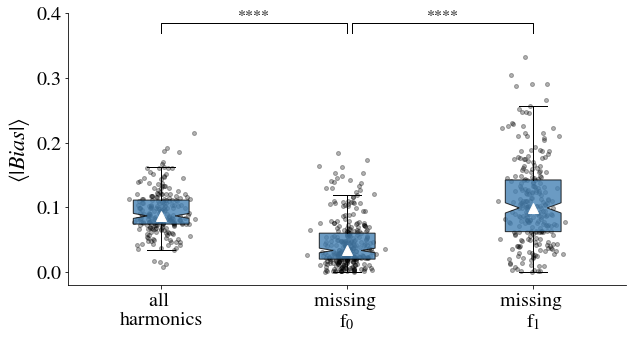

In [12]:
def box_plot(ax, data, xlabel = [], ylabel = [], title = '', alpha_face = 1, show_ind_dots = True, colors = []):
    
    l = len(data)
    y = np.arange(l)
    
    noise = []
    ys = []
    for i in range(l):
        ys.append(np.ones_like(data[i])*y[i])
        noise.append(np.random.randn(len(ys[i]))*.07)
    if show_ind_dots:
        for i in range(l):
            ax.plot(ys[i]+noise[i],data[i],'o',ms=4,color='k',alpha=.3)
        try:
            ax.plot(ys, data,  '-', color = 'k',alpha=.05)
            ax.plot(ys, np.mean(data,1), '-k',lw=2)
        except:
            pass
    
    bplot1 = ax.boxplot(data , notch = 'True', positions=y, vert=1, patch_artist=True, showmeans=False,\
                        meanprops={"markerfacecolor":"w", "markeredgecolor":"w"},\
                        showfliers = False, widths = 0.3, boxprops=dict(alpha=alpha_face))
    
    for patch,c in zip(bplot1['boxes'],colors):
        patch.set_facecolor(c)
        patch.set_alpha(alpha_face)
        
    for median in bplot1['medians']:
        median.set_color('firebrick')
        median.set(linewidth=0)


colors = ['steelblue', 'steelblue', 'steelblue']

data = d1_area

labels = r'$\langle|Bias|\rangle$'   

f, axarr = plt.subplots(figsize = (10,5))
ax = axarr


box_plot(ax, data, 
        xlabel = ['all \nharmonics','missing \n$\mathrm{f_0}$','missing \n$\mathrm{f_1}$'],
        ylabel = labels, 
        colors = colors, 
        alpha_face = 0.8)

ax.set_xticklabels(['all \nharmonics','missing \n$\mathrm{f_0}$','missing \n$\mathrm{f_1}$'], fontsize=22)
ax.set_ylabel(labels, fontsize = 22)

simpleaxis(ax,20)


# plot the medians with triangle markers inside the boxplot
y_median = []
x_median = [0, 1, 2]
for x in x_median:
    y_median.append(np.median(d1_area[x]))

plt.plot(x_median, y_median, marker = '^', markerfacecolor='white', markersize = 10, 
    markeredgecolor = 'white', color='white', linestyle='')


# statistical annotation
x1, x2, x3 = 0, 1, 2 # columns 'all harmonics', 'missing f0', 'missing f1' 
y, h, col = 0.37, 0.015, 'k'
delta = 0.025

plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c=col)
plt.text((x1+x2)*.5, y+h, "****", ha='center', va='bottom', color=col, fontsize=16)

x2 = x2+delta
plt.plot([x2, x2, x3, x3], [y, y+h, y+h, y], lw=1, c=col)
plt.text((x2+x3)*.5, y+h, "****", ha='center', va='bottom', color=col, fontsize=16)

plt.ylim(-0.02, 0.4)

#saveas = '../images/figure4/figure4_'+str(5)+'.png'
#plt.savefig(saveas, format='png', dpi=800,bbox_inches='tight')

plt.show()

### Statistics

In [ ]:
for j in range(3):
    print(j)
    df = dfs[j]

    df_1 = df[(df['flags_d1'].values==4)].copy()
    df_1 = df_1.set_index(np.arange(len(df_1)))

    df_1['d1_r'] = df_1['d1']
    print(len(df_1))

    datar = base.data_frame(df_1)
    datar[columns.index('subject')] = base.as_factor(datar[columns.index('subject')]) # declaring y1 into a factor

    print('=================  exp {} ============================'.format(str(j)))

    b1 = mgcv.gam(ro.r(model),\
                data=datar,\
                family=fam,\
                optimizer='perf')

    print(mgcv.summary_gam(b1))

In [ ]:
dunn = importr('dunn.test')

for param, param_name in zip([d1_slope], ['$\mathrm{<|Bias|>}$']):
    print('=========================================')
    print(param_name)
    print('============KRUSKAL===============')
    print(kruskal(*param))
    k = dunn.dunn_test(param, method="bonferroni")
    print('============DUNN===============')
    print(k)

In [ ]:
methods = ['variance','slope']
for i in range(3):
    print('==============================')
    print('Exp:{}'.format(i))
    for m,data in enumerate([[d1_var], [d1_slope]]):
        print('method: {}'.format(methods[m]))
        print('{}/{}'.format((np.array(data[0][i])>0).sum(), len(data[0][i])))
        # print('{}/{}'.format((np.array(data[1][i])>0).sum(), len(data[1][i])))

In [ ]:
# testing the significant of slopes (larger than 0)
for i in range(3):
    print('==============================')
    for data in [[d1_slope]]:
        print(wilcoxon(data[0][i]))
        # print(wilcoxon(data[1][i]))

In [ ]:
models = ['y~ s(alphas,by=df,k=5) + d1_r + s(dinf,k=7) + \
                s(subject,bs="re") + s(d1_r,subject,bs="re")',

        'y~ s(alphas,by=df,k=5) + s(dinf,k=7) + s(subject,bs="re")']


for j in range(3):

        print(j)
        df = dfs[j]

        # df_1 = df[(df['flags_d1'].values==4) | (df['flags_d1'].values==5)].copy()
        df_1 = df[(df['flags_d1'].values==4)].copy()
        df_1 = df_1.set_index(np.arange(len(df_1)))

        df_1['d1_r'] = df_1['d1']

        print(len(df_1))

        datar = base.data_frame(df_1)
        datar[columns.index('subject')] = base.as_factor(datar[columns.index('subject')]) # declaring y1 into a factor

        print('=================  exp {} ============================'.format(str(j)))
        b = mgcv.gam(ro.r(models[0]),\
                data=datar,\
                family=fam,\
                optimizer='perf')

        b2 = mgcv.gam(ro.r(models[1]),\
                data=datar,\
                family=fam,\
                optimizer='perf')

        print(mgcv.anova_gam(b,b2,test='Chisq'))